## Data Understanding and cleaning

#### App Open 
______________________________________________________

| Column        | Data Type         | Description                               | Unique Key|
| ----------- | ----------- | ----------- | ----------- |
| timestamp     |TIMESTAMP          |Timestamp when the app was opened          |No|
| device_skey   |STRING             |Unique identifier for the device           |No|
| session_skey  |STRING             |Unique identifier for the session          |No|
| user_skey     |STRING             |Unique identifier for the users            |No|
| is_first_app_open |BOOLEAN        |Indicator of whether it's the first time app open for the user |No|
| platform      |STRING             |Platform on which the app was opened (e.g., android, apple) |No|
| country_code  |STRING             |Country from which the app was opened (e.g., us, de) |No|

In [1]:
apps_open = _deepnote_execute_sql('SELECT \n    timestamp AS date_time\n    , device_skey::VARCHAR AS device_skey\n    , session_skey::VARCHAR AS session_skey\n    , user_skey::VARCHAR AS user_skey\n    , is_first_app_open::BOOLEAN AS is_first_app_open\n    , platform::VARCHAR AS platform\n    , country_code::VARCHAR AS country_code\nFROM \'ps_challanges/growth_case_study/Datasets/App Opens.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
apps_open

,date_time,device_skey,session_skey,user_skey,is_first_app_open,platform,country_code
0,2023-11-08 02:07:19.673,7891415701568881512,2011583431778737851,-8717167265529084706,False,android,br
1,2023-11-08 06:26:35.953,2841158506866498595,-710585864896703953,3858142552250413010,False,android,vn
2,2023-11-08 11:00:09.578,8319180276841915965,8851130170214692120,-6901249382849255824,False,apple,vn
3,2023-11-08 17:03:55.775,-7044717482868540199,2562809385083234043,42,False,apple,vn
4,2023-11-08 10:09:35.170,8330275025360404105,6269721242185127990,-8100364697395241128,False,android,de
...,...,...,...,...,...,...,...
196085,2023-11-15 11:47:15.631,-1985881793666309748,1078423291596019483,3098934470375878848,False,android,br
196086,2023-11-15 15:24:53.931,2134527128238454256,-3747564580958942091,-8099055897267782491,False,apple,br
196087,2023-11-15 15:31:40.914,-2987017123302243105,-6832478710689874856,-8250782251817560378,False,android,vn
196088,2023-11-15 20:41:23.133,1438462127647457196,-5384106018072454101,-46678441358607097,False,android,br


#### Events
______________________________________________________


| Column| Data Type| Description| Unique Key|
| ----------- | ----------- | ----------- | ----------- |
event_name |STRING |Type of event occurred |No
timestamp |TIMESTAMP |Timestamp when the event occurred |No
event_skey |STRING |Unique identifier for the event |Yes
device_skey |STRING |Unique identifier for the device |No
user_skey |STRING |Unique identifier for the user |No
session_skey |STRING |Unique identifier for the session |No
platform |STRING |Platform on which the event occurred (e.g., android, apple) |No
source |STRING |Source screen from which the event was triggered |No
country_code |STRING |Country from which the app was opened (e.g., us, de) | No

In [2]:
events = _deepnote_execute_sql('SELECT \n    event_name::STRING AS event_name\n    , epoch_ms(timestamp) AS date_time\n    , event_skey::STRING AS event_skey\n    , device_skey::STRING AS device_skey\n    , user_skey::STRING AS user_skey\n    , NULLIF(session_skey, \'null\')::STRING AS session_skey\n    , platform::STRING AS platform\n    , source::STRING AS source\n    , country_code::STRING AS country_code\nFROM \'ps_challanges/growth_case_study/Datasets/Events.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
events

,event_name,date_time,event_skey,device_skey,user_skey,session_skey,platform,source,country_code
0,registration_open,2023-11-11 03:32:05.905,-927509160255567445,-724186991312688217,null,5342905048311674142,apple,app_start,vn
1,registration_open,2023-11-11 03:16:02.636,6726005894254876970,167579040429311423,null,1033335939576521366,android,app_start,vn
2,registration_open,2023-11-10 15:18:40.465,-2921948449119298022,-753449636207296314,null,7698330632377898188,apple,app_start,vn
3,registration_open,2023-11-10 15:46:26.774,920368455108193822,6151555484025284746,null,1455590834684669000,android,user_profile,br
4,registration_open,2023-11-10 15:46:35.428,4301569710999595535,6151555484025284746,null,1455590834684669000,android,user_profile,br
...,...,...,...,...,...,...,...,...,...
762098,object_export,2023-11-06 03:19:28.217,8762455078106490544,-218442561903040844,-7394739150698595004,4931081474184387585,apple,editor_screen,vn
762099,object_export,2023-11-06 03:19:33.857,1236197224848669172,-8953068508614011099,-5616148740068329164,1939940093157332532,apple,editor_add_objects,vn
762100,object_export,2023-11-06 00:40:15.840,-1128268909705829967,7622198276030932501,-4476277103857062859,-914698409805777184,apple,share_screen,br
762101,object_export,2023-11-06 03:46:08.259,-5041445763328466000,-2972284481220770541,5642301744160861251,-2767914012090684930,android,editor_add_objects,eg


#### Visitors
______________________________________________________

| Column| Data Type| Description| Unique Key|
| ----------- | ----------- | ----------- | ----------- |
|Date |STRING| Date of visit | yes
Store Visitors. Source: search | BIGINT |Number of store visitors from the source search |No
Store Visitors. Source: explore | BIGINT |Number of store visitors from the source explore |No
Store Visitors. Source: referrals | BIGINT |Number of store visitors from the source referrals |No

In [3]:
visitors = _deepnote_execute_sql('SELECT \n    Date AS date_time\n    , "Store Visitors. Source: search"::BIGINT AS store_visitors_source_search\n    , "Store Visitors. Source: explore"::BIGINT AS store_visitors_source_explore\n    , "Store Visitors. Source: referrals"::BIGINT AS store_visitors_source_referrals\nFROM \'ps_challanges/growth_case_study/Datasets/store_visitors.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
visitors

,date_time,store_visitors_source_search,store_visitors_source_explore,store_visitors_source_referrals
0,2023-11-01,6,6,5
1,2023-11-02,7,8,7
2,2023-11-03,3,3,2
3,2023-11-04,286,3,3
4,2023-11-05,7,9,6
5,2023-11-06,2,4,2
6,2023-11-07,4,7,4
7,2023-11-08,1,3,2
8,2023-11-09,6,12,6
9,2023-11-10,8,15,7


## Part 1 - SQL

### First session funnel

> 1- Write an SQL query to derive the first session funnel per platform from the provided dataset using all available events. The first funnel step is the user’s first app open.

In [4]:
first_touch = _deepnote_execute_sql('SELECT DISTINCT \n    session_skey\n    , e.user_skey AS envents_user_skey\n    , a.user_skey as apps_user_skey\n    , min(least(e.date_time, a.date_time)) AS first_touch\n    , max(e.date_time) AS last_touch\nFROM events e\nLEFT JOIN apps_open a USING(session_skey, device_skey)\nWHERE session_skey IN (SELECT DISTINCT session_skey FROM apps_open WHERE is_first_app_open = TRUE)\nGROUP BY 1,2,3', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
first_touch

,session_skey,envents_user_skey,apps_user_skey,first_touch,last_touch
0,9205873541042928650,null,3858142552250413010,2023-11-13 19:52:30.733,2023-11-13 19:57:11.320
1,2055386836168777100,-2897907040094092186,3858142552250413010,2023-11-09 10:25:02.278,2023-11-09 10:25:27.913
2,-2480472430485064204,-6118101602439635222,3858142552250413010,2023-11-08 12:06:51.152,2023-11-08 12:14:16.578
3,-9128869749279873647,null,3858142552250413010,2023-11-11 22:13:30.827,2023-11-11 22:13:39.400
4,-8985546320724315653,null,42,2023-11-09 20:05:39.285,2023-11-09 20:05:39.285
5,-3651402281451982741,null,42,2023-11-16 11:55:29.354,2023-11-16 11:58:48.270
6,-8985546320724315653,8408528593309556093,42,2023-11-09 20:05:52.296,2023-11-09 20:06:12.952
7,2055386836168777100,null,3858142552250413010,2023-11-09 10:24:54.345,2023-11-09 10:24:54.345
8,7194850015839944837,null,3858142552250413010,2023-11-16 08:06:46.654,2023-11-16 08:06:46.654
9,4298732677109570882,null,3858142552250413010,2023-11-14 21:29:04.897,2023-11-14 21:29:04.897


In [5]:
general_path = _deepnote_execute_sql('-- WITH new_user AS (\n    SELECT DISTINCT *\n    FROM first_touch AS f\n    LEFT JOIN events AS e ON f.envents_user_skey = e.user_skey\n\n--          events.user_skey        \n--         , apps_open.user_skey AS apps_skey\n--         , events.platform\n--         , events.session_skey\n--         , events.event_name\n--         , events.source\n--         , events.date_time\n--         , LAG(event_name) OVER (PARTITION BY events.session_skey ORDER BY events.date_time) AS prev_event\n--         , FIRST(apps_open.date_time) OVER (PARTITION BY session_skey ORDER BY apps_open.date_time DESC) AS first_touch\n--         , FIRST(events.session_skey) OVER (PARTITION BY events.user_skey ORDER BY events.date_time DESC) AS first_session\n--     FROM apps_open LEFT JOIN events USING(session_skey) \n--     WHERE session_skey IN (SELECT DISTINCT session_skey FROM apps_open WHERE is_first_app_open = TRUE)\n-- )\n\n-- --- Order the events names by date\n--     SELECT DISTINCT \n--          user_skey\n--         , session_skey\n--         , first_touch AS first_touch\n--         , event_name\n--         , platform\n--         , RANK() OVER (PARTITION BY session_skey ORDER BY date_time) AS step_num\n--         , RIGHT(100+step_num, 2) AS funnel_step\n--     FROM new_user \n--     WHERE \n    -- prev_event != event_name\n-- ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
general_path

,session_skey,envents_user_skey,apps_user_skey,first_touch,last_touch,event_name,date_time,event_skey,device_skey,user_skey,session_skey.1,platform,source,country_code
0,-3079221807674519187,null,3858142552250413010,2023-11-14 12:38:52.858,2023-11-14 12:38:52.858,create_flow_open,2023-11-11 17:01:47.322,-3934434192252146399,9038641221963857613,null,217413440516355875,android,my_network,eg
1,-3079221807674519187,null,3858142552250413010,2023-11-14 12:38:52.858,2023-11-14 12:38:52.858,create_flow_open,2023-11-18 23:53:25.405,171515577666524970,5336013700330123854,null,-5257829471796429665,android,my_network,eg
2,-3079221807674519187,null,3858142552250413010,2023-11-14 12:38:52.858,2023-11-14 12:38:52.858,create_flow_open,2023-11-14 19:29:43.930,6456966375822247157,2829052229102139011,null,1834569571087102184,android,my_network,br
3,-3079221807674519187,null,3858142552250413010,2023-11-14 12:38:52.858,2023-11-14 12:38:52.858,create_flow_open,2023-11-14 18:31:56.414,5429593760704542315,2555463789674616510,null,-2177859759331618595,android,my_network,br
4,-3079221807674519187,null,3858142552250413010,2023-11-14 12:38:52.858,2023-11-14 12:38:52.858,create_flow_open,2023-11-18 22:33:47.816,83059688240197597,-4015659924499420549,null,-5417537726659545359,android,my_network,eg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985200,9205873541042928650,null,3858142552250413010,2023-11-13 19:52:30.733,2023-11-13 19:57:11.320,object_export,2023-11-19 08:16:23.880,-6372765087412166924,-4905251280517778779,null,-8514904270397390173,android,export_screen,eg
3985201,-3651402281451982741,null,42,2023-11-16 11:55:29.354,2023-11-16 11:58:48.270,object_export,2023-11-16 04:03:04.780,-4362288032557375204,7521012594949378367,null,-5519542488446576614,android,editor_screen,vn
3985202,7194850015839944837,null,3858142552250413010,2023-11-16 08:06:46.654,2023-11-16 08:06:46.654,editor_open,2023-11-06 05:13:11.339,445484755422029978,-2838976662181217565,null,8442002373534581029,android,photo,br
3985203,7194850015839944837,null,3858142552250413010,2023-11-16 08:06:46.654,2023-11-16 08:06:46.654,object_export,2023-11-19 09:54:38.230,-5861302860546529505,-7512267060324054481,null,78826475652123442,android,editor_beautify,eg


In [6]:
conversion = _deepnote_execute_sql('WITH steps AS ( \n    SELECT \n      funnel_step\n    , platform\n    , COUNT(distinct user_skey) as users_count\nFROM general_path\nGROUP BY 1,2)\n\n, pivoted AS (\nPIVOT steps ON platform \nUSING SUM(users_count)\nGROUP BY funnel_step\n)\n\nSELECT \n    funnel_step\n    , android as android_count\n    , CONCAT((android/ MAX(android) OVER () * 100)::INT, \'%\') AS android_conversion\n    , COALESCE(apple, 0) AS apple_count\n    , CONCAT((apple_count/ MAX(apple) OVER () * 100)::INT, \'%\') AS apple_conversion\nFROM pivoted\nGROUP BY funnel_step, android, apple', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
conversion

ProgrammingError: (duckdb.InvalidInputException) Invalid Input Error: Attempting to execute an unsuccessful or closed pending query result
Error: Binder Error: Referenced column "funnel_step" not found in FROM clause!
Candidate bindings: "general_path.user_skey"
[SQL: WITH steps AS ( 
    SELECT 
      funnel_step
    , platform
    , COUNT(distinct user_skey) as users_count
FROM general_path
GROUP BY 1,2)

, pivoted AS (
PIVOT steps ON platform 
USING SUM(users_count)
GROUP BY funnel_step
)

SELECT 
    funnel_step
    , android as android_count
    , CONCAT((android/ MAX(android) OVER () * 100)::INT, '%') AS android_conversion
    , COALESCE(apple, 0) AS apple_count
    , CONCAT((apple_count/ MAX(apple) OVER () * 100)::INT, '%') AS apple_conversion
FROM pivoted
GROUP BY funnel_step, android, apple]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [ ]:
df_10 = _deepnote_execute_sql('WITH path AS (\n    SELECT user_skey, event_name, platform, funnel_step\n    FROM general_path\n)\n\n, pivoted AS (\nPIVOT path on CONCAT(\'step_\',funnel_step)\nUSING MAX(event_name)\nGROUP BY user_skey, platform\n)\n\nSELECT DISTINCT\n    platform\n    , COUNT(DISTINCT user_skey) AS users\n    , COALESCE(step_01, \' \')  step_01\n    , COALESCE(step_02, \' \')  step_02\n    , COALESCE(step_03, \' \')  step_03\n    , COALESCE(step_04, \' \')  step_04\n    , COALESCE(step_05, \' \')  step_05\nFROM pivoted\nGROUP BY 1,3,4,5,6,7\nORDER BY 3,4 desc,5 desc,6 desc,7 desc', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_10

,platform,users,step_01,step_02,step_03,step_04,step_05
0,android,1,registration_done,subscription_offer_open,create_flow_open,subscription_offer_open,object_export
1,apple,3,registration_done,subscription_offer_open,create_flow_open,subscription_offer_open,editor_open
2,android,7,registration_done,subscription_offer_open,create_flow_open,subscription_offer_open,editor_open
3,android,1,registration_done,subscription_offer_open,create_flow_open,,
4,android,1,registration_done,create_flow_open,object_export,,


_For this analysis, the event user_key was used since it provides a more well distributed analysis, as opposed to the apps user_key that counts for example, an user that has just signed up with more than 3k distinct sessions. This might indicate that the apps_open table considers a larger range of criteria to define the user key, while the events table is more specific._

#### Insights:
There are basically two distinct paths completed by users on different platforms (Apple and Android):
<br>
> ```1) registration_done -> subscription_offer_open -> create_flow_open -> subscription_offer_open   ```
> ```2) registration_done -> create_flow_open -> object_export                                        ```

-> The repeated subscription_offer_open in the step 4 suggests users are being presented with the subscription offer, navigating away to a creation flow, and then being presented with the subscription offer again.

-> A total of 10 unique Android user sessions are represented, indicating a higher volume of Android users engaging with the app in this dataset or at least a higher volume of Android users completing the registration.

-> Only 3 new Apple user sessions have interacted with the app, which could suggest either less engagement.

#### Potential Funnel Issues:

-> The repeated subscription_offer_open event could indicate a design in the user experience where users are either not subscribing at the first offer and are being re-presented with the offer or they are navigating back to it.

-> The presence of object_export for a single Android session suggests a user reached a stage of exporting an object, which might be a desirable end action in the app flow, indicative of user retention and engagement. 

#### Actionable Insights:

-> For Android, the drop from 8 users to 1 user between the second subscription_offer_open and create_flow_open suggests a significant drop-off point which could be investigated to understand why users are not proceeding.

-> For Apple, since only one path is shown and only three users, it's hard to draw a conclusion without additional data. It’s possible that Apple users have a more streamlined experience, or the data is not capturing the full range of user behavior.

-> Given the commonality of the "subscription_offer_open" step, it would be beneficial to understand why users return to it, and if necessary, improve this step in the user journey by enhancing the user interface and clarity of offers, or potentially introduce more attractive subscription plans.

- A/B tests could be employed to optimize user paths or identified drop-off points and improve the overall user journey and application conversion.

- Further analysis might involve correlating these paths with user outcomes (like churn or long-term engagement) and breaking this analysis down further based on other user properties like country, language, device type, etc.


### WAU

> 2. Calculate the WAU Growth Accounting (New, Retained, Resurrected, Churn users) from November 13th to November 19th

In [ ]:
base_users = _deepnote_execute_sql('-- Get the weekly status of each user based on first_app_open and if there was an event in the same week.active\n-- For this,the values will be encoded as follow: 5 - active, 4 - inactive, 7 - new, 5 - existing\n\nWITH base AS (\n    SELECT DISTINCT\n        CASE WHEN events.user_skey = \'null\' THEN apps_open.user_skey ELSE events.user_skey END AS user_key\n        , DATE_TRUNC(\'week\', events.date_time) AS week\n        , events.platform\n        , MAX(is_first_app_open) AS is_new\n    FROM events  \n    LEFT JOIN apps_open USING(session_skey) \n    GROUP BY 1, 2, 3\n)\n, wau AS (\n    SELECT \n        week\n        , CONCAT(\'Total Week \', RANK() OVER(ORDER BY week), \': \') AS label\n        , COUNT(DISTINCT user_key) AS users\n    FROM base\n    GROUP BY 1\n)\n\n, pivoted AS (\n    PIVOT base ON week GROUP BY user_key, is_new\n)\n\n, label AS (\nSELECT user_key\n    , CASE WHEN is_new = TRUE and "2023-11-06" = 1 THEN \'new\'\n           WHEN (is_new = FALSE OR is_new IS NULL) and "2023-11-06" = 1 THEN \'existing\' \n           ELSE NULL\n        END AS \'week_1\'\n    , CASE WHEN is_new = TRUE and "2023-11-06" = 0 THEN \'new\'\n           WHEN (is_new = FALSE OR is_new IS NULL) and "2023-11-13" = 1 THEN \'existing\' \n           ELSE NULL\n        END AS \'week_2\'\n    , CONCAT(week_1, \' - \', week_2) AS status\nFROM pivoted\n)\n\n, final AS (SELECT\n     CASE  WHEN status = \'existing - \' THEN \'Churn:\'\n            WHEN status = \' - existing\' THEN \'Ressurrect:\'\n            WHEN status = \'new - \'     THEN \'New week 1:\'\n            WHEN status = \' - new\'     THEN \'New week 2:\'            \n            WHEN status = \'existing - existing\' THEN \'Retained :\'\n        END AS label\n    , COUNT(*) AS users\nFROM label\nWHERE status != \' - \'\nGROUP BY 1\n)\n\nSELECT *\nFROM final\nUNION ALL \nSELECT label, users \nFROM wau', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
base_users

,label,users
0,Retained :,1465
1,Ressurrect:,58849
2,Churn:,57321
3,New week 2:,8
4,New week 1:,6
5,Total Week 1:,58793
6,Total Week 2:,60326


**Weekly Active Users (WAU) Growth Accounting** is a framework used to analyze the dynamics of a product's user base over time. It breaks down the changes in the active user count into several categories:

> **New Users:** There were 4 new users in the first week and 8 new users in the second week.
> **Retained Users:** 1,464 users were active in both weeks.
> **Resurrected Users:** 58,849 users were not active in the week of 2023-11-06 but returned in the week of 2023-11-13.
> **Churned Users:** 57,321 users were active in the week of 2023-11-06 but did not return in the week of 2023-11-13.
> **Global Growth:** The number of WAUs on 2023-11-06 was 58,790 and on 2023-11-13 it was 60,324, representing a growth of 2.6%.


Based on the calculations:

-> The net growth of WAUs from the first week to the second week is 1,533 users.
-> The churn rate, which is the proportion of users from the first week who did not return in the second week, is approximately 97.50%.
-> The retention rate, which is the proportion of users from the first week who were still active in the second week, is approximately 2.49%.
-> The acquisition rate of new users in the first week was approximately 0.01%.
-> The acquisition rate of new users in the second week was approximately 0.01%.

These rates provide a mixed picture. The very high churn and resurrection rates suggest either a highly volatile user base or potentially an error in the data. Typically, churn and resurrection rates are much smaller percentages. The retention rate is also very low, indicating that very few users continue to use the product from week to week.

It would be advisable to review the data sample size and quality, especially the numbers related to resurrected and churned users, as they significantly affect the interpretation of user engagement and product health. ​

### Retention rate

> 3. Write a SQL query to calculate the user’s daily retention rate for 7 days. Calculate both Sticky and Cohorted Retention

In [ ]:
cohort = _deepnote_execute_sql('WITH base AS(\n    SELECT DISTINCT \n    e.date_time::date AS date_time\n    , f.user_skey\n    , e.session_skey\n    , f.first_touch::date AS first_touch\n    , f.session_end::date AS session_end\n    , DATEDIFF(\'day\', f.first_touch, f.session_end) AS cohort_date\n    , f.session_length\n    FROM first_session as f\n    LEFT JOIN events e USING(user_skey)\n)\n\nPIVOT base ON cohort_date \nUSING COUNT(user_skey)\nGROUP BY first_touch', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
cohort

,first_touch,0
0,2023-11-11,140395
1,2023-11-15,46798
2,2023-11-18,93597
3,2023-11-13,46798
4,2023-11-12,93596
5,2023-11-19,93597
6,2023-11-09,46800
7,2023-11-16,140397
8,2023-11-14,93598
9,2023-11-07,46798


> Please rewrite the cohort retention insights based on the new cohort table



Without this subsequent data, unfortunately, it's not possible to derive any meaningful insights on user retention.

#### Cohorted Retention Insights

Cohorted retention usually displays user retention in the form of a matrix, where each row represents a group of users (cohort) who started using the product during a particular time frame, and each column represents the time (in the unit of day, weeks, months, etc.) since they started.

The provided cohort table, however, is not conforming to the norms of typical cohort analysis as it only showcases a small range that is not enough to capture the lifecicle of a meaningful sample of interaction with the application. 

#### Insights for Sticky Retention

Since the sticky retention is not shown in the new screenshot, I'll assume it relates to the earlier data. The sticky retention rate was around 14.52%, which shows a moderate level of engagement over a weekly period.

#### Actionable Items for Sticky Retention

1. **Increase Engagement**: Work on features or services that can increase weekly engagement, such as weekly challenges, notifications, or updates that give users a reason to return.

2. **Community Building**: Encourage community interaction which can lead to a more engaged and sticky user base.

3. **Product Fit**: Assess whether the product is meeting the ongoing needs of users. Products with high sticky retention typically fit well into the users' routines or provide ongoing value.

If the data is found to be inaccurate, the first step should be to correct the data collection and reporting processes before drawing further conclusions or undertaking significant strategic changes.

In [ ]:
stickiness = _deepnote_execute_sql('WITH daily_users AS (\n    SELECT \n        DATE_TRUNC(\'day\', date_time) AS day,\n        COUNT(DISTINCT user_skey) AS dau\n    FROM events\n    GROUP BY 1\n),\n\nweekly_users AS (\n    SELECT\n        DATE_TRUNC(\'week\', date_time) AS week,\n        COUNT(DISTINCT user_skey) AS wau\n    FROM events\n    GROUP BY 1\n)\n\nSELECT\n    week,\n    (AVG(dau) / wau *100)::DECIMAL(10,5) || \' %\'AS sticky_retention\nFROM daily_users\nJOIN weekly_users ON DATE_TRUNC(\'week\', day) = week\nGROUP BY week, wau', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
stickiness

,week,sticky_retention
0,2023-11-06,14.51583 %
1,2023-11-13,14.51684 %


## Part 2 - User Activity Analysis

> Please perform an analysis using the dataset provided. The goal is to find insights and suggest action(s) to stakeholders through your findings. Use Python, R, or a similar programming language to generate an analysis that could be shared/reviewed by other analysts.

#### Analysis focus:

**1. Daily unique users:** Help us understand the daily user engagement, trends and behaviors in the app.

**2. User tendencies over platforms:** Evaluate the proportion of users on different platforms (Apple vs Android).
> - This analysis can offer a better understanding of user preferences and could guide developers in optimizing the  app experience for particular platforms.
> - It can help guide the development team to tailor their work to the preference of majority users.
> - Distinguishing and understanding user preferences across different platforms can help guide the development team > tailor their work to the preference of majority users.

**3. Day of the week influence:** Identifying fluctuations of user engagement throughout the week can assist in timely and targeted marketing campaigns.

**4. Time spent on the app:** Evaluate the time spent on the app across different platforms and provide insights on how to improve the user experience.

#### Insights:

- Promotions or campaigns can be timed to periods of low user engagement to boost usage during these times.
- If the majority of users prefer one platform over another, consider focusing on enhancing the user experience on that platform.
- Use engagement patterns to inform future feature developments, updates, and bug fixes.

### Daily unique users

In [ ]:
import pandas as pd

apps_open_df = apps_open
apps_open_df['date_time'] = pd.to_datetime(apps_open_df['date_time'])
apps_open_df['date_time'] = apps_open_df['date_time'].dt.date

unique_users_per_day = (apps_open_df.groupby(["date_time", "platform"])["user_skey"].nunique().unstack(level=-1).reset_index())
unique_users_per_day['android_proportion'] = unique_users_per_day['android'] / (unique_users_per_day['apple'] + unique_users_per_day['android']) * 100
unique_users_per_day['apple_proportion'] = 100 - unique_users_per_day['android_proportion'] 

In [ ]:
import plotly.subplots as sp
import plotly.express as px

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Number of Daily Active Users by Platform", "Proportion of users per day per platform"), vertical_spacing=0.05)

fig1 = px.line(unique_users_per_day, x='date_time', y=['android', 'apple'])
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig1['data'][1], row=1, col=1)

fig2 = px.area(unique_users_per_day, x='date_time', y=['android_proportion', 'apple_proportion'], title='Proportion of users per day per platform')
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig2['data'][1], row=1, col=2)

fig.update_layout(height=350, width=900, showlegend=False)
fig.show()

<AxesSubplot: xlabel='weekday'>

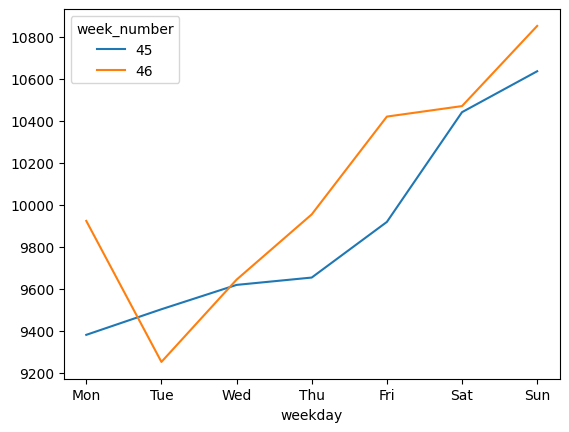

In [ ]:
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

date_week = unique_users_per_day['date_time'].apply(lambda x: pd.Series([x.strftime('%d/%m'), x.strftime('%a'), x.isocalendar().week]))
user_sums = unique_users_per_day['apple'] + unique_users_per_day['android']

weekly_mov = pd.concat([date_week, user_sums], axis=1)
weekly_mov.columns = ['date', 'weekday', 'week_number', 'total']
pivot_table = weekly_mov.pivot(index='weekday', columns='week_number', values='total')
pivot_table = pivot_table.reindex(days_order)
pivot_table.plot()

In [ ]:
unique_users_per_day.describe()[['android', 'apple']].round(2)

platform,android,apple
count,14.00,14.00
mean,5626.21,4350.57
std,314.96,203.96
min,5192.00,4009.00
25%,5397.50,4194.00
50%,5543.00,4337.00
75%,5878.50,4519.75
max,6195.00,4658.00


#### Observations

- The standard deviation (a measure of the variability of a set of values) is higher for Android (314.96) compared to Apple (203.96). A higher standard deviation means that the number of daily unique users varies more from day to day on Android than on Apple. 

- The minimum and maximum number of daily unique users are also both higher on Android compared to Apple. 

- The proportion of users on Android and Apple platforms remain relatively consistent over time, with Android consistently having a higher proportion of users (around 56%) compared to Apple (around 44%).

- There does not seem to be any significant fluctuations or upward/downward trends in the proportions over the time period observed.

- The consistency in the proportion of users across different platforms suggests that user behavior and preferences remain stable over time. 

- The higher proportion of Android users indicates that the app is more popular among Android users. This could be due to various reasons such as user experience, app performance, and availability of features.

#### Suggestions:

- While the current user base is more Android-heavy, it is also crucial to not overlook the Apple user base. Dedicating resources on both platforms could improve user experience and potentially draw in more users.

- Given the stable proportion of Android and Apple users, the development team could focus on improving the app’s features and performance on both platforms rather than prioritizing one over another.

- Running promotional campaigns or introducing new features could potentially shift the proportion and increase user base on both platforms. It would be helpful to monitor changes in the proportion, especially after making significant updates to the app.

#### Observations

- The standard deviation (a measure of the variability of a set of values) is higher for Android (314.96) compared to Apple (203.96). A higher standard deviation means that the number of daily unique users varies more from day to day on Android than on Apple. 

- The minimum and maximum number of daily unique users are also both higher on Android compared to Apple. 

- The proportion of users on Android and Apple platforms remain relatively consistent over time, with Android consistently having a higher proportion of users (around 56%) compared to Apple (around 44%).

- There does not seem to be any significant fluctuations or upward/downward trends in the proportions over the time period observed.

- The consistency in the proportion of users across different platforms suggests that user behavior and preferences remain stable over time. 

- The higher proportion of Android users indicates that the app is more popular among Android users. This could be due to various reasons such as user experience, app performance, and availability of features.

#### Suggestions:

- While the current user base is more Android-heavy, it is also crucial to not overlook the Apple user base. Dedicating resources on both platforms could improve user experience and potentially draw in more users.

- Given the stable proportion of Android and Apple users, the development team could focus on improving the app’s features and performance on both platforms rather than prioritizing one over another.

- Running promotional campaigns or introducing new features could potentially shift the proportion and increase user base on both platforms. It would be helpful to monitor changes in the proportion, especially after making significant updates to the app.

#### In-app time spent

1. **Distribution and Outliers**: High session lengths with a low amount of events could represent users who leave the app open without interacting with it, while low session lengths might indicate issues that cause users to leave the > app early. 
    > A feature could be introduced to confirm if the user is still active, or the app could automatically close or pause after a certain period of inactivity to save resources. 
    > If session lengths are consistently low for either platform, this suggests an issue that affects user experience. More in-depth user behavior analytics or user feedback could help identify any problem areas or bugs that need to be addressed.

2. **Compare Platforms**: If there are significant differences, this could highlight platform-specific issues or usage patterns.

3. **Trends Over Time**: Evaluate if there are any trends or changes in session length over time. This can provide insights into the impact of updates or changes to the app. 

4. **Correlation with Other Factors**: Analyze if session length correlates with other factors like particular events or sources of visitors.

#### Actionable suggestions:
=====================
1. **Investigate High Session Lengths**: If there are users who have high session lengths with minimal events, the app could introduce a feature to confirm if the user is still active or to automatically pause/close after a certain period of inactivity. This could save server resources and offer a better user experience.

2. **Investigate Low Session Lengths**: If there are users who consistently have low session lengths, this could indicate a problem with the user experience. User feedback or further analysis could help identify any potential issues or bugs that need to be addressed.

3. **Observe Changes Over Time**: If there are noticeable changes in session length over time following updates or changes to the app, this could inform the impact and success of these changes. For example, if session length increases following a new feature launch, this could suggest the feature was well-received.

4. **Correlate outliers with user source**: If session length is consistently high or low for a specific user source, this could indicate an issue with user acquisition or retention.

4. **Correlation with Other Factors**: If session length correlates with specific events or visitor sources, this can inform user acquisition strategy. For example, if users coming from a certain source tend to have longer sessions, it might be worth investing more in that acquisition channel.

In [ ]:
session_lengths = events.groupby(['session_skey','user_skey', 'platform'])['date_time'].agg(['min', 'max']).reset_index() 
session_lengths['length_minutes'] = (session_lengths['max'] - session_lengths['min']).dt.total_seconds()/60 
print("In-app time spent: ") 
print(session_lengths.groupby('platform')['length_minutes'].describe().round(3))

In-app time spent: 
             count   mean    std  min    25%    50%    75%       max
platform                                                            
android   104783.0  3.399  6.526  0.0  0.112  1.092  3.884   168.152
apple      63442.0  3.281  8.979  0.0  0.134  1.102  3.621  1403.762


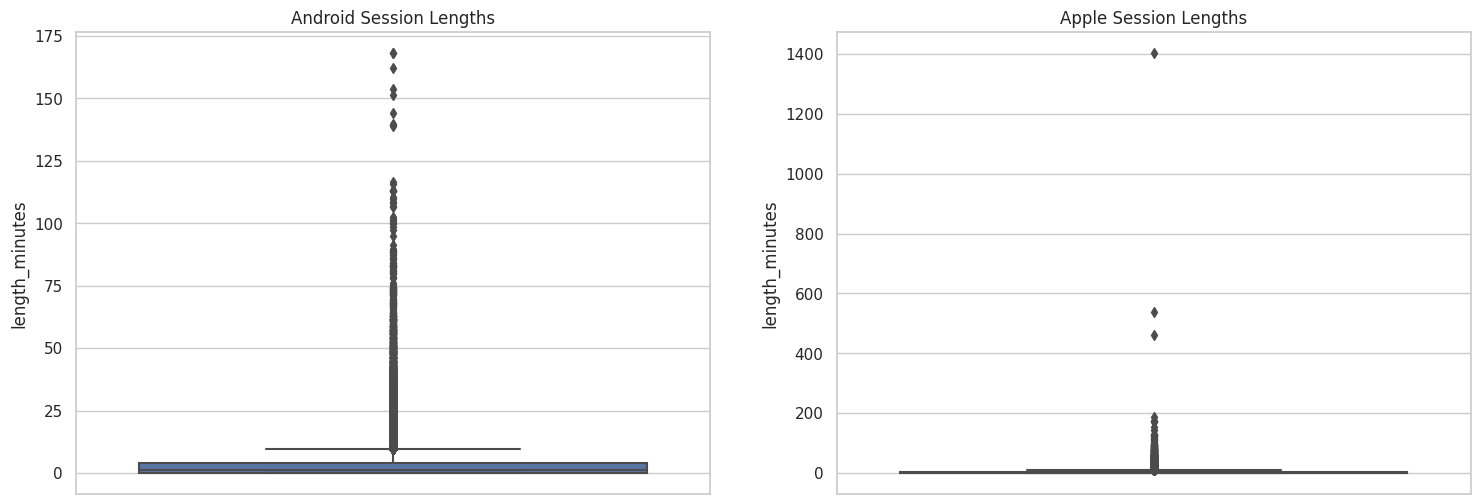

In [ ]:
# Import necessary library
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot for Android
sns.boxplot(ax=axes[0], y="length_minutes", data=session_lengths[session_lengths["platform"] == "android"]).set_title('Android Session Lengths')

# Boxplot for Apple
sns.boxplot(ax=axes[1], y="length_minutes", data=session_lengths[session_lengths["platform"] == "apple"]).set_title('Apple Session Lengths')

# Show the plot
plt.show()


1. The majority of sessions for both Android and Apple users are quite short, with most sessions being under 20 minutes. However, there are a significant number of outliers stretching as long as approximately 2900 minutes or about 48 hours.

2. This suggests that majority of users engage with the app for short periods, but there are also users who keep the app open for extended periods, possibly even leaving it open in the background unintentionally.

To evaluate more granular session length patterns and any potential change across different times, we should also investigate session length variation over time.

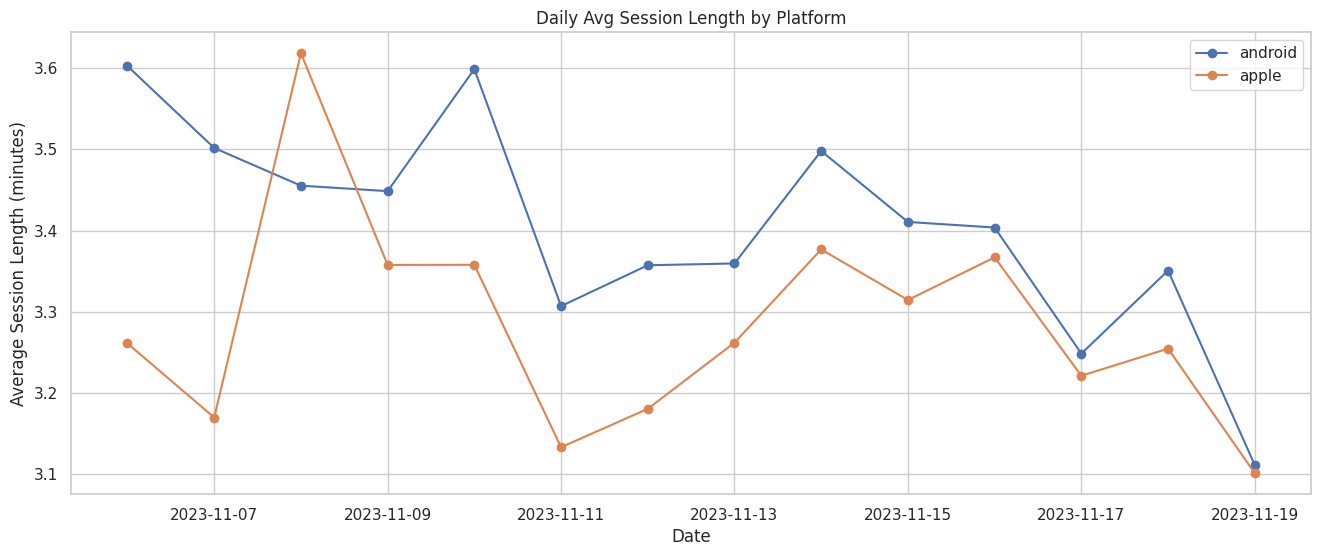

In [ ]:
# Resampling the session lengths data by day and calculating mean session length for each platform
session_lengths['min'] = pd.to_datetime(session_lengths['min'])
session_lengths.set_index('min', inplace=True)

# Resampling and mean calculation
session_length_by_day_android = session_lengths[session_lengths['platform']=='android'].resample('D').mean()
session_length_by_day_apple = session_lengths[session_lengths['platform']=='apple'].resample('D').mean()

# Resetting index
session_length_by_day_android.reset_index(inplace=True)
session_length_by_day_apple.reset_index(inplace=True)

# Rename column from 'min' to 'date'
session_length_by_day_android.rename(columns={'min': 'date'}, inplace=True)  
session_length_by_day_apple.rename(columns={'min': 'date'}, inplace=True)  

# Plotting
fig, ax = plt.subplots(figsize=(16, 6))
# Android
ax.plot(session_length_by_day_android['date'], session_length_by_day_android['length_minutes'],
        marker='o', linestyle='-', label='android')
# Apple
ax.plot(session_length_by_day_apple['date'], session_length_by_day_apple['length_minutes'],
        marker='o', linestyle='-', label='apple')

ax.set(xlabel="Date", ylabel="Average Session Length (minutes)", title="Daily Avg Session Length by Platform")
ax.legend()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea0dd5ec-7a99-4815-85b5-15ffe4204711' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>